In [69]:
from astropy.table import Table
from astropy import units as u
from astropy.coordinates import SkyCoord

import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.wcs import WCS
from astropy import visualization
from spectral_cube import SpectralCube
import warnings
import pandas as pd

tbl = Table.read('table234.tex', format='latex')

In [70]:
a = tbl["R.A."]

RA_offset = []
for i in a:
    d = i.replace("$-$", "-")
    RA_offset.append(float(d))

tbl["R.A."] = RA_offset

In [94]:
a = np.copy(tbl["R.A."])

array([ 7.94700e+01,  8.89400e+01,  8.90800e+01,  0.00000e+00,
        7.20900e+01,  7.23900e+01,  1.19360e+02,  1.29200e+02,
        1.25340e+02,  1.24670e+02,  1.25620e+02,  1.25450e+02,
        1.29330e+02,  1.25690e+02,  6.30000e-01,  7.97200e+01,
        8.24100e+01,  1.30330e+02,  4.32600e+01,  1.26160e+02,
        6.67000e+01,  6.68800e+01,  1.09270e+02,  1.25980e+02,
       -1.97600e+01,  1.09320e+02,  2.19900e+01,  1.28270e+02,
        3.98090e+02,  1.09330e+02,  1.04820e+02,  3.97930e+02,
       -2.81100e+01,  1.11240e+02,  1.10370e+02,  1.09970e+02,
        5.83100e+01,  3.84150e+02, -4.46620e+02, -4.51210e+02,
       -4.09000e+02,  8.67300e+01, -4.51770e+02,  1.10140e+02,
        7.85600e+01,  1.40000e+01, -4.50390e+02, -4.49590e+02,
        9.23800e+01,  7.15060e+02,  1.15640e+02,  8.24200e+01,
        6.32260e+02, -3.61440e+02,  1.00030e+02,  8.53800e+02,
        1.00480e+02, -4.13520e+02, -4.03210e+02, -3.60930e+02,
       -3.61750e+02, -3.61340e+02,  5.89860e+02, -3.373

In [71]:
b = tbl["decl."]

decl_offset = []
for i in b:
    d = i.replace("$-$", "-")
    decl_offset.append(float(d))

tbl["decl."] = decl_offset

In [96]:
b = np.copy(tbl["decl."])
coords = SkyCoord(a,b, unit='mas')

<SkyCoord (ICRS): (ra, dec) in deg
    [(2.20750000e-05, -6.22500000e-06), (2.47055556e-05,  1.32000000e-05),
     (2.47444444e-05,  1.31111111e-05), (0.00000000e+00,  0.00000000e+00),
     (2.00250000e-05, -2.50000000e-07), (2.01083333e-05, -3.41666667e-07),
     (3.31555556e-05,  8.68611111e-06), (3.58888889e-05,  2.20000000e-06),
     (3.48166667e-05,  8.65000000e-06), (3.46305556e-05,  1.06722222e-05),
     (3.48944444e-05,  1.07138889e-05), (3.48472222e-05,  8.40000000e-06),
     (3.59250000e-05,  2.30555556e-06), (3.49138889e-05,  1.06388889e-05),
     (1.75000000e-07, -1.96666667e-06), (2.21444444e-05,  5.45555556e-06),
     (2.28916667e-05, -7.06666667e-06), (3.62027778e-05,  1.74444444e-06),
     (1.20166667e-05, -4.83055556e-06), (3.50444444e-05,  1.11111111e-06),
     (1.85277778e-05,  2.18888889e-05), (1.85777778e-05,  2.19138889e-05),
     (3.03527778e-05, -7.05555556e-06), (3.49944444e-05,  1.94444444e-07),
     (3.59999995e+02, -1.49416667e-05), (3.03666667e-05, -7.09722

In [90]:

c = SkyCoord('19h23m40.05s', '+14d31m05.59s', frame='fk5')
c.ra

<Longitude 290.916875 deg>

In [73]:
def w51north_settings():

    ax.axis([6750,7750,6750,7750])

    radesys = ww.wcs.radesys
    
    _ = ax.set_xlabel(f"Right Ascension {ww.wcs.radesys}")
    _ = ax.set_ylabel(f"Declination {ww.wcs.radesys}")
    
    tick_fontsize = 14
    fontsize = 16
    ra = ax.coords['ra']
    ra.set_major_formatter('hh:mm:ss.s')
    dec = ax.coords['dec']
    ra.set_axislabel(f"RA ({radesys})", fontsize=fontsize)
    dec.set_axislabel(f"Dec ({radesys})", fontsize=fontsize, minpad=0.0)
    ra.ticklabels.set_fontsize(tick_fontsize)
    ra.set_ticklabel(exclude_overlapping=True)
    dec.ticklabels.set_fontsize(tick_fontsize)
    dec.set_ticklabel(exclude_overlapping=True)
    
    return ax

In [74]:
fn = '/orange/adamginsburg/w51/2017.1.00293.S/may2021_successful_imaging/w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor'
fh = SpectralCube.read(fn, format='casa_image')
cen = fh.shape[1]/2, fh.shape[2]/2

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    ww = WCS(fh[0].header)

/home/dealderod/.local/lib/python3.8/site-packages/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]


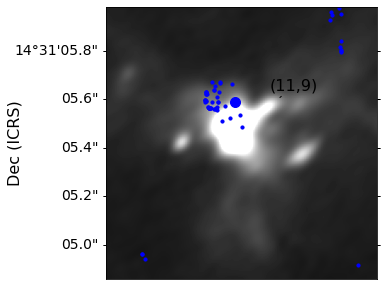

In [98]:
fig, ax = plt.subplots(figsize=(5,5))

ax = pl.subplot(projection=ww)
w51north_settings()

im = ax.imshow(fh[0].data, cmap='gray', norm=visualization.simple_norm(fh[0].data, stretch='linear', max_percent=99.999))

ax.scatter(c.ra.deg, c.dec.deg, s=100, c = "blue", transform=ax.get_transform('world'))
ax.scatter(c.ra.deg + coords.ra.deg, c.dec.deg + coords.dec.deg , s=10, c = "blue", transform=ax.get_transform('world'))

ax.axis([cen[0]-180,cen[0]-20,cen[1]-20,cen[1]+140])

ax.annotate('(11,9)', (290.916824, 14.51822272), xytext=(290.916824+0.00001, 14.51822272+0.00001), 
    arrowprops = dict(arrowstyle="-"), xycoords=ax.get_transform('world'), fontsize=16)
plt.show()

In [87]:
c.ra.deg

290.91620833333326